In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
df=pd.read_csv('EastWestAirlines.csv')

In [5]:
df

,data,balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA

In [6]:
df.isnull().sum()

data                 0
balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
df.head()

,data,balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
df.corr()

,data,balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
data,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [9]:
df.dtypes

data                 int64
balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [10]:
df.columns

Index(['data', 'balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [11]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)


In [12]:
DF_norm=norm_func(df.iloc[:,1:]) 

In [13]:
DF_norm 

,balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


 # visualization

<AxesSubplot:>

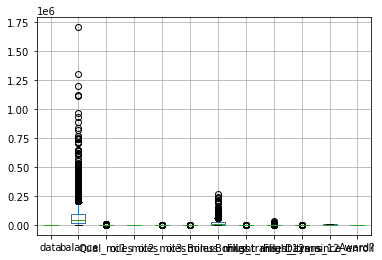

In [14]:
df.boxplot()

array([[<AxesSubplot:title={'center':'data'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'Qual_miles'}>],
       [<AxesSubplot:title={'center':'cc1_miles'}>,
        <AxesSubplot:title={'center':'cc2_miles'}>,
        <AxesSubplot:title={'center':'cc3_miles'}>],
       [<AxesSubplot:title={'center':'Bonus_miles'}>,
        <AxesSubplot:title={'center':'Bonus_trans'}>,
        <AxesSubplot:title={'center':'Flight_miles_12mo'}>],
       [<AxesSubplot:title={'center':'Flight_trans_12'}>,
        <AxesSubplot:title={'center':'Days_since_enroll'}>,
        <AxesSubplot:title={'center':'Award?'}>]], dtype=object)

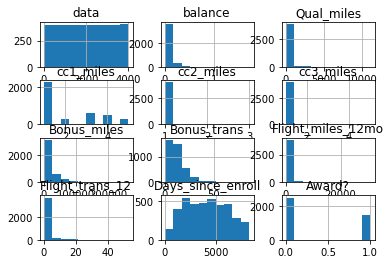

In [15]:
df.hist()

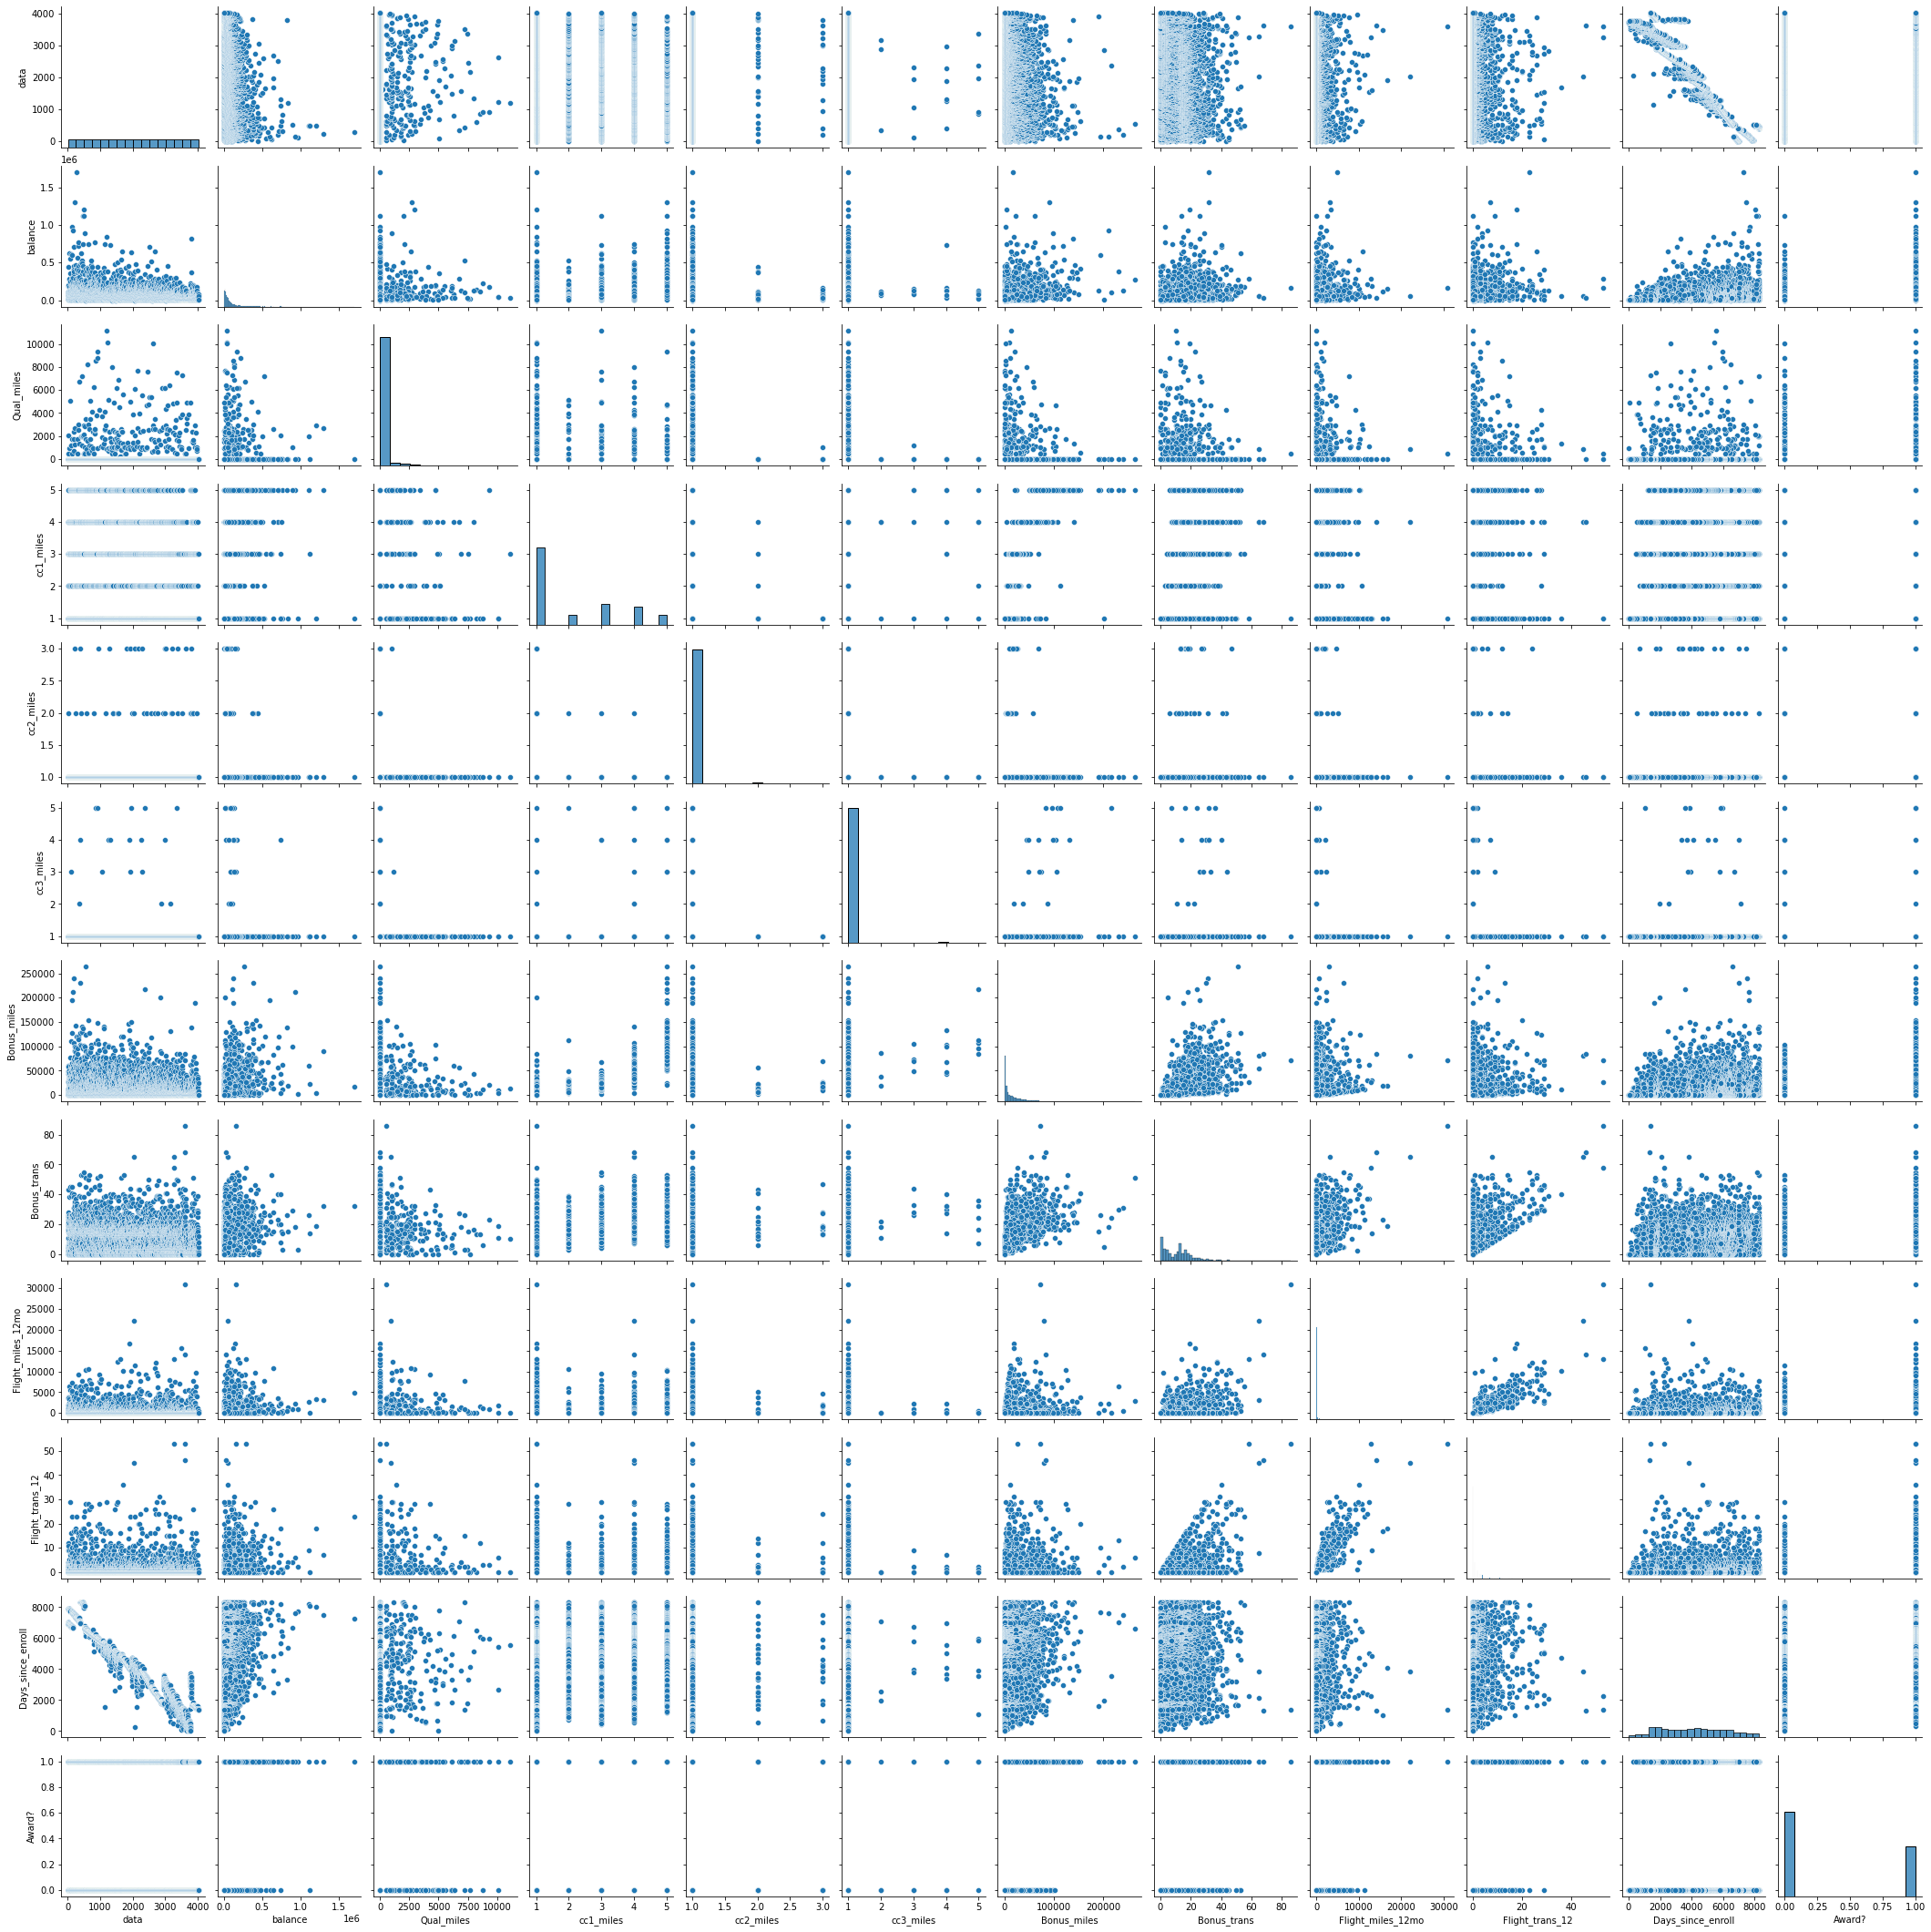

In [16]:
sns.pairplot(df)

 # Hierarchical clustering

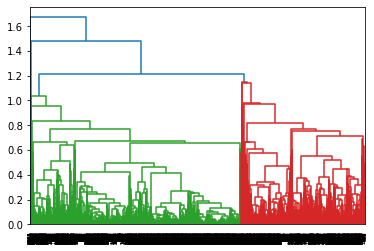

In [19]:
dendrogram=sch.dendrogram(sch.linkage(DF_norm,method='average')) 

In [20]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete') 
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [21]:
y_hc=hc.fit_predict(DF_norm) 

In [22]:
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [23]:
df['h_clusterid']=hc.labels_

In [24]:
df

,data,balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


# Kmeans

In [25]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [26]:
df1=pd.read_csv('EastWestAirlines.csv')

In [27]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [28]:
DF_norm=norm_func(df.iloc[:,1:]) 

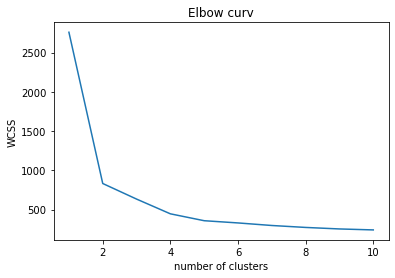

In [29]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(DF_norm) 
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(DF_norm) 
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [32]:
x=pd.Series(model.labels_)
df1['Clust']=x 

In [33]:
df1

,data,balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [34]:
df1.iloc[:,1:5].groupby(df1.Clust).mean()

,balance,Qual_miles,cc1_miles,cc2_miles
Clust,,,,
0,40747.617290,92.345809,1.092778,1.017923
1,108317.387376,198.336634,3.915842,1.001238
2,83529.153046,290.453195,1.156018,1.032689
3,118032.061192,73.112721,3.576490,1.001610


# DBSCAN

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [36]:
df3=pd.read_csv('EastWestAirlines.csv')

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   data               3999 non-null   int64
 1   balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [38]:
DF=df3.iloc[:,1:5] 

In [39]:
DF.values

array([[28143,     0,     1,     1],
       [19244,     0,     1,     1],
       [41354,     0,     1,     1],
       ...,
       [73597,     0,     3,     1],
       [54899,     0,     1,     1],
       [ 3016,     0,     1,     1]], dtype=int64)

In [40]:
stscaler=StandardScaler().fit(DF.values)
x=stscaler.transform(DF.values) 

In [41]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01,
        -9.82418871e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01,
        -9.82418871e-02]])

In [42]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)


DBSCAN(eps=2)

In [43]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [45]:
cl 

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [46]:
pd.concat([df3,cl],axis=1)

,data,balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
